# Importing Libraries

In [1]:
import pydub 

import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import tensorflow_io as tfio

from IPython.display import Audio, display
from jiwer import wer

2024-02-07 09:17:00.112794: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-02-07 09:17:00.150248: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-07 09:17:00.150278: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-02-07 09:17:00.151411: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-02-07 09:17:00.157915: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-02-07 09:17:00.158268: I tensorflow/core/platform/cpu_feature_guard.cc:1

# Importing the data from my downloads folder

data is got from https://commonvoice.mozilla.org/en/datasets -luganda corpus 6.1 12/22/2020

In [2]:
DATA_DIR = "/home/shawal/Downloads/lg/"
AUDIO_DIR = "/home/shawal/Downloads/lg/clips/"

train     = pd.read_csv(f"{DATA_DIR}train.tsv",       sep="\t")
test      = pd.read_csv(f"{DATA_DIR}test.tsv",        sep="\t")
dev       = pd.read_csv(f"{DATA_DIR}dev.tsv",         sep="\t")
invalid   = pd.read_csv(f"{DATA_DIR}invalidated.tsv", sep="\t")
other     = pd.read_csv(f"{DATA_DIR}other.tsv",       sep="\t")
reported  = pd.read_csv(f"{DATA_DIR}reported.tsv",    sep="\t")
validated = pd.read_csv(f"{DATA_DIR}validated.tsv",   sep="\t")

In [3]:
train

,client_id,path,sentence,up_votes,down_votes,age,gender,accent,locale,segment
0,7b01ca05762b1c62944a249461f1dc5ade5bc855aebd8e...,common_voice_lg_23717981.mp3,Nze nnakoowa okukima amazzi kuba temunsasula b...,2,0,thirties,female,NaN,lg,NaN
1,7b01ca05762b1c62944a249461f1dc5ade5bc855aebd8e...,common_voice_lg_23718760.mp3,Neebaza nnyo ssezaala wange kuba yangabira ente.,3,0,thirties,female,NaN,lg,NaN
2,7b01ca05762b1c62944a249461f1dc5ade5bc855aebd8e...,common_voice_lg_23718761.mp3,Ntudde nnyo kati omugongo gunnuma.,2,0,thirties,female,NaN,lg,NaN
3,7b01ca05762b1c62944a249461f1dc5ade5bc855aebd8e...,common_voice_lg_23718762.mp3,Omuntu akusaba ssente ate nga naawe tolina aku...,2,0,thirties,female,NaN,lg,NaN
4,7b01ca05762b1c62944a249461f1dc5ade5bc855aebd8e...,common_voice_lg_23718763.mp3,Amawulire g'ennaku zino galimu nnyo okuttingan...,2,0,thirties,female,NaN,lg,NaN
...,...,...,...,...,...,...,...,...,...,...
1245,7b01ca05762b1c62944a249461f1dc5ade5bc855aebd8e...,common_voice_lg_23909150.mp3,Bw'osalawo okutandika okulunda embuzi olina ok...,2,0,thirties,female,NaN,lg,NaN
1246,7b01ca05762b1c62944a249461f1dc5ade5bc855aebd8e...,common_voice_lg_23909562.mp3,Amayuuni galimibwa mu bitundu ebirimu amazzi.,2,0,thirties,female,NaN,lg,NaN
1247,7b01ca05762b1c62944a249461f1dc5ade5bc855aebd8e...,common_voice_lg_23909607.mp3,Tugende e Makindye tulabe abayimbi n'abazannyi...,2,0,thirties,female,NaN,lg,NaN
1248,7b01ca05762b1c62944a249461f1dc5ade5bc855aebd8e...,common_voice_lg_23909643.mp3,Okulima ensangi zino tekukyalimu nnyo ssete ng...,2,0,thirties,female,NaN,lg,NaN


In [4]:
sample_audio_dir:str = AUDIO_DIR + train['path'][0]
audio = pydub.AudioSegment.from_file(sample_audio_dir)
audio

In [9]:
audio_contents = tf.io.read_file(sample_audio_dir)
audio_contents

<tf.Tensor: shape=(), dtype=string, numpy=b'ID3\x04\x00\x00\x00\x00\x00#TSSE\x00\x00\x00\x0f\x00\x00\x03Lavf57.56.101\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\xff\xfbP\xc4\x00\x03\xc0\x00\x01\xa4\x00\x00\x00 \x00\x004\x80\x00\x00\x04\x00 P\xb0\xdd\x10\n\x18\\.\x1b\x90\xac\x9fT@\xc4<\xc4&\xee\xe7\xee\xef\xe8\x89\xa2\x16\xee\xef\x1d\xf4D.\xa2Ww\xf2?\xe2\'\xa1n\xe7\xff\xd3\xe2&\x89\xbb\x9f\xff\xfa!TM\xdd\xfd\x1c\xd0"\x17\x0f\x89\xea8Q\xc2~RNA\xb6wL\xe7{\xbd\xd8\xe5\xe0\xe8\x0c\x80)*\x9c!\xa6\xea\xf5r\x9dw\\8\xe5\x1e\x15\x05\xce\xd7\x19|\x95mA\xd12f\xc4P\x9d\x1b\xbe\x11@r\x10\x03p\xf2>h\xc9\x0e8\x01d\x1cR\x0c\xe539\xd7\x11\xce\x9a\x9a\xe24\xdcj\x133MH\xc2\xd8\xaf{\xff\xff\x8cql\rA\xe2D\x93\xf5{<\xab\x99c\xff\xf5\xaf\xc3\x9cJ\x9aJ\x15Xr\x177\xf38S\xbby\xff\xff\xfbR\xc4]\x80\x08\xd8\xf4\xcc\xd4\x91\x80\x02k&fw2\xf0\x00\xd6~\xf5\xb6B\xf8\xadH\xb1\xa6\xceh\xa2i3\xe9"@\x84\xcb\xed\xff\xff\xff\xffb\x82\xa3\x8a\xf2\xf6\xd67\xf3\r\x9fR*\x85!&l\x956\x00al7\xc0\x86{\x13F\x18i\x03\xf5_E\xb6\x83\xf

In [10]:
decoded_audio = tfio.audio.decode_mp3(audio_contents)
decoded_audio

<tf.Tensor: shape=(231552, 1), dtype=float32, numpy=
array([[0.0000000e+00],
       [0.0000000e+00],
       [0.0000000e+00],
       ...,
       [8.0776354e-09],
       [4.1631121e-09],
       [2.5510825e-09]], dtype=float32)>

In [12]:
# resample audio to 16 kHz
resampled_wav = tfio.audio.resample(decoded_audio, audio.frame_rate, 16000)
resampled_wav

<tf.Tensor: shape=(84009, 1), dtype=float32, numpy=
array([[0.0000000e+00],
       [0.0000000e+00],
       [0.0000000e+00],
       ...,
       [8.8454035e-09],
       [1.3394112e-08],
       [1.0540537e-08]], dtype=float32)>

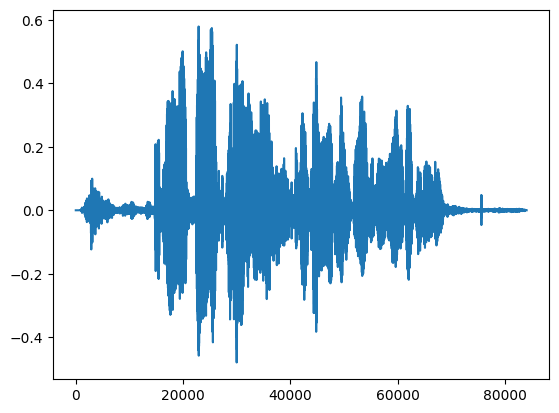

In [17]:
plt.plot(resampled_wav)

In [25]:
# converting the audio into image representation

# we need a one dimensional tensor to convert it into a spectrogram
# so we will convert the audio into a one dimensional tensor
resampled_wav = tf.squeeze(resampled_wav, axis=-1)

spectrogram_tensor = tfio.audio.spectrogram(resampled_wav, nfft=120, window=120, stride=120)

# spectrogram = tf.signal.stft(resampled_wav.numpy(), frame_length=255, frame_step=32)
spectrogram_tensor = tf.abs(spectrogram_tensor)
spectrogram_tensor

<tf.Tensor: shape=(701, 61), dtype=float32, numpy=
array([[0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       ...,
       [1.7519125e-04, 3.3594418e-04, 2.6535059e-04, ..., 2.9025106e-05,
        9.3278522e-06, 4.7445064e-07],
       [2.0231273e-06, 9.8306609e-06, 1.4612585e-05, ..., 9.0494967e-07,
        1.5116606e-07, 1.4620866e-07],
       [1.3544403e-09, 1.3516147e-09, 1.3431640e-09, ..., 1.9452663e-10,
        1.9738830e-10, 1.9835977e-10]], dtype=float32)>

In [26]:
spectrogram_tensor = tf.expand_dims(spectrogram_tensor, axis=2)

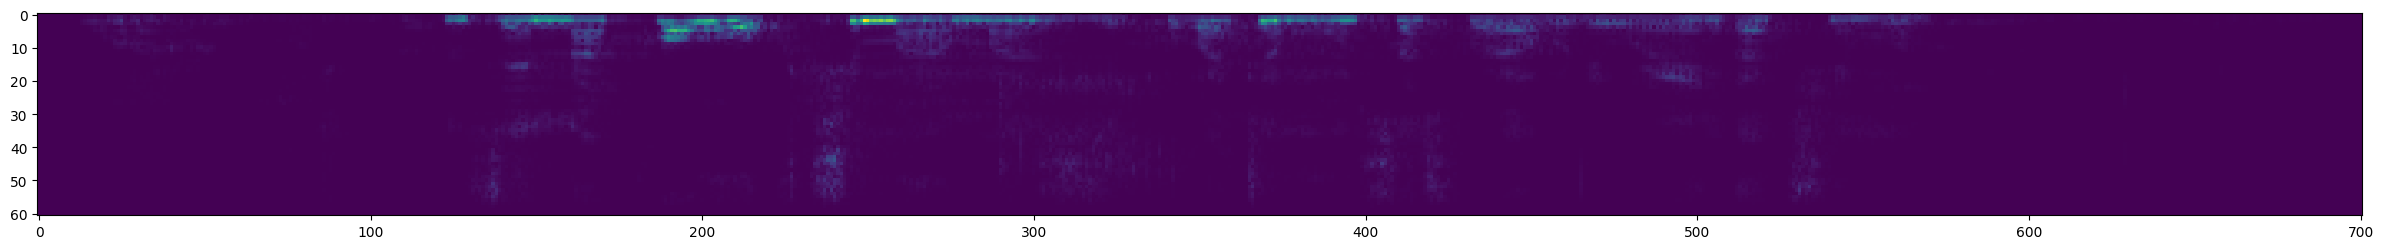

In [31]:
plt.figure(figsize=(30, 20))
plt.imshow(tf.transpose(spectrogram_tensor)[0])
plt.show()


# Create tensorflow dataset